In [1]:
! pip install deepface

     |████████████████████████████████| 65 kB 2.2 MB/s 
     |████████████████████████████████| 2.3 MB 14.6 MB/s 
     |████████████████████████████████| 60.5 MB 57 kB/s 
     |████████████████████████████████| 87 kB 5.8 MB/s 
     |████████████████████████████████| 462 kB 37.6 MB/s 
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115942 sha256=12971cc7331cabe51bfac5d569716179b7a05c956958ae3ce9f121f71eed2701
  Stored in directory: /root/.cache/pip/wheels/8a/67/fb/2e8a12fa16661b9d5af1f654bd199366799740a85c64981226
Successfully built fire
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have img

In [2]:
import cv2
import matplotlib.pyplot as plt
from google.colab import files
import pandas as pd
from deepface import DeepFace

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


In [53]:
print('Image')
im = files.upload()
print('Upload the file')
files.upload()

Output hidden; open in https://colab.research.google.com to view.

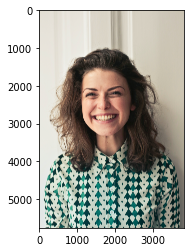

In [78]:
image = cv2.imread('a3.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB));
dim = (400,500)
  
# resize image
image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

In [79]:
pred1 = DeepFace.analyze(image, actions=['emotion'])
pred2 = DeepFace.analyze(image, actions=['age'])


In [80]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

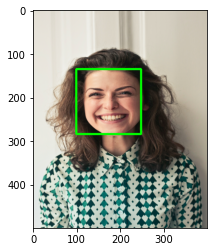

In [81]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray,1.1,4)

for (x,y,w,h) in faces:
  cv2.rectangle(image, (x,y),(x+w,y+h), (0,255,0),3)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB));

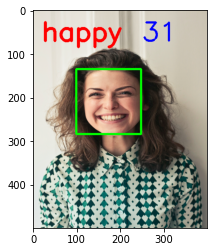

In [82]:

font = cv2.FONT_HERSHEY_SIMPLEX 
cv2.putText(image,
            pred1['dominant_emotion'],
            (20,70),
            font,2,
            (0,0,255),
            5,
            cv2.LINE_4);
            
cv2.putText(image,
            str(pred2['age']),
            (250,70),
            font,2,
            (255,0,0),
            4,
            cv2.LINE_4);
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB));